In [1]:
import pandas as pd
names = pd.read_csv('yob2017.txt', index_col=0,header=None)


In [2]:
%matplotlib inline

In [3]:
names.columns=['Sex','NumberB']
names.rename_axis('Name')
print(names)


          Sex  NumberB
0                     
Emma        F    19738
Olivia      F    18632
Ava         F    15902
Isabella    F    15100
Sophia      F    14831
Mia         F    13437
Charlotte   F    12893
Amelia      F    11800
Evelyn      F    10675
Abigail     F    10551
Harper      F    10451
Emily       F     9746
Elizabeth   F     8915
Avery       F     8186
Sofia       F     8134
Ella        F     8014
Madison     F     7847
Scarlett    F     7679
Victoria    F     7267
Aria        F     7132
Grace       F     6991
Chloe       F     6912
Camila      F     6752
Penelope    F     6639
Riley       F     6343
Layla       F     6274
Lillian     F     6132
Nora        F     6036
Zoey        F     6026
Mila        F     5941
...        ..      ...
Zayer       M        5
Zayir       M        5
Zechari     M        5
Zecharia    M        5
Zee         M        5
Zeid        M        5
Zennith     M        5
Zeo         M        5
Zerrick     M        5
Zevon       M        5
Zhen       

In [4]:
names.sort_values(by=['NumberB']).tail(10)

,Sex,NumberB
0,,
Logan,M,13974
James,M,14232
Sophia,F,14831
William,M,14904
Isabella,F,15100
Ava,F,15902
Noah,M,18326
Olivia,F,18632
Liam,M,18728


Number of rows and columns

In [5]:
names.shape

(32469, 2)

Calculate the total number of births in one year

In [6]:
names[['NumberB']].sum()

NumberB    3546301
dtype: int64

Calculate the top 10 percentages of all births

In [7]:
names.sort_values(by=['NumberB']).tail(10)

,Sex,NumberB
0,,
Logan,M,13974
James,M,14232
Sophia,F,14831
William,M,14904
Isabella,F,15100
Ava,F,15902
Noah,M,18326
Olivia,F,18632
Liam,M,18728


Create a bar plot with 5 names from one year

In [8]:
namesFive = names.sort_values(by=['NumberB']).tail(5)

In [9]:
#namesFive.index

In [10]:
#namesFive.plot.bar()

In [11]:
namesFive.set_index(namesFive.index,drop=True,inplace=True)

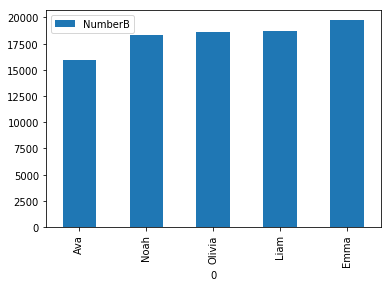

In [13]:
plot =namesFive.plot.bar()
fig = plot.get_figure()
#matplotlib inline
fig.savefig("top5.png")

Plot a time series with one name over all years

In [92]:
import os
#locating the data
path = '/Users/julianchan/Desktop/names/NameData/'
file_list = os.listdir(path)
file_list
#create empty data frame
DataFrame = []
for fi in file_list:
    #if fi.endswith(".txt"):
    full_path = path + fi
    
    ##load file as a DataFrame
    colnames=['NAME','GENDER', 'NUMBER']
    data_df = pd.read_csv(full_path, names = colnames)
    data_df.set_index('NAME',inplace=True)
    ##add a file_name column to data_df
    data_df["YEAR"] = int(fi[3:7])
    
    ##add file into list
    DataFrame.append(data_df)
    
#Show the contents of DataFrame
DataFrame
#concatenate
big_data_frame = pd.concat(DataFrame)




In [97]:
big_data_frame.head(10)

,GENDER,NUMBER,YEAR
NAME,,,
Emily,F,25953,2000
Hannah,F,23080,2000
Madison,F,19967,2000
Ashley,F,17997,2000
Sarah,F,17697,2000
Alexis,F,17629,2000
Samantha,F,17266,2000
Jessica,F,15709,2000
Elizabeth,F,15094,2000


In [93]:
big_data_frame.loc['Julian'].head(5)

,GENDER,NUMBER,YEAR
NAME,,,
Julian,F,104,2000
Julian,M,4589,2000
Julian,F,31,2014
Julian,M,7665,2014
Julian,F,7,1938


In [94]:
Julian = big_data_frame.loc['Julian']
Male   = Julian[Julian['GENDER'] == 'M']
#big_data_frame[(big_data_frame.loc['Julian']) & 
#               (big_data_frame[big_data_frame['GENDER']] == 'M')]

Male.head(5)

,GENDER,NUMBER,YEAR
NAME,,,
Julian,M,4589,2000
Julian,M,7665,2014
Julian,M,425,1938
Julian,M,129,1910
Julian,M,65,1904


Plot a time series with one name over all years

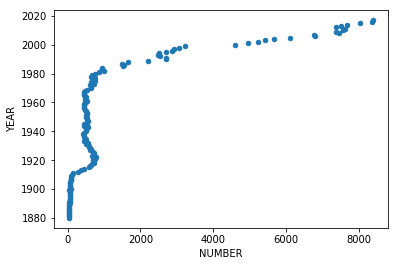

In [95]:
Male.plot.scatter('NUMBER','YEAR')

Plot the number of distinct boy/girl names over time

In [120]:
info = big_data_frame[['YEAR','GENDER']]
infoM = info[info['GENDER'] == 'M']
infoF = info[info['GENDER'] == 'F']

In [119]:
infoM['YEAR'].value_counts()
infoF['YEAR'].value_counts()

2008    14613
2009    14523
2007    14390
2011    14343
2010    14256
2012    14234
2016    14162
2017    14160
2014    14047
2013    14038
2006    14032
2015    14024
2005    13364
2004    13220
2003    12753
2002    12482
2001    12299
2000    12116
1999    11609
1998    11301
1997    10811
1996    10532
1995    10327
1994    10244
1993    10169
1992     9816
1991     9646
1990     9484
1989     9227
1988     8487
        ...  
1909     1679
1908     1584
1907     1549
1900     1506
1905     1421
1906     1413
1904     1395
1902     1320
1903     1306
1898     1289
1896     1266
1892     1260
1895     1241
1894     1239
1897     1229
1901     1210
1899     1200
1893     1179
1888     1177
1890     1161
1891     1127
1884     1125
1889     1111
1886     1110
1882     1099
1885     1097
1887     1067
1880     1058
1883     1030
1881      997
Name: YEAR, Length: 138, dtype: int64

plot the number of distinct boy/girl names over time

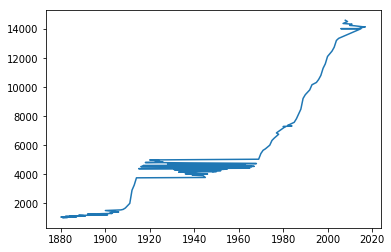

In [124]:
infoM['YEAR'].value_counts().plot()
infoF['YEAR'].value_counts().plot()

In [131]:
X = Male['YEAR'].values.reshape(-1, 1)
Y = Male['NUMBER'].values

In [132]:
X.shape,Y.shape

((138, 1), (138,))

In [142]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,Y)
reg.coef_
reg.intercept_
#reg.predict(X) #YOu may uncomment this to see the fitted values 
#Note the negative scores for some years! 
#This implies linear model is not a good model

-78725.34024066055

Normalize the data by the total number of births

In [167]:
from sklearn.preprocessing import normalize
#normalize(X)
#Output looks weird
import statistics 
y = (Y - np.mean(Y)) / (statistics.stdev(Y)) 
#This looks a lot better!

Improve the fit using a polynomial regression

In [151]:
from sklearn.preprocessing import PolynomialFeatures
lin_regressor = LinearRegression()
poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X)
poly = lin_regressor.fit(X_transform,Y)
poly.coef_

array([ 0.00000000e+00, -3.23692890e+03,  8.41182435e-01])

In [152]:
poly.intercept_

3113616.956431702

Notes from class

In [ ]:
#df['count'][.loc['Nicholas','Paul','Helena','Tom']]
#df[df['count'] > 1000].head(3)
#freq_boys = df[(df['count']>1000) & (df[df['gender']] ) ]
#b = df[df['gender']] != 'F'
#df.isna()
#df.dropna()
